# Themoxalide Data Generation

In [48]:
import random
import numpy as np
import pandas as pd
from scipy.stats import poisson
import plotly.express as px

SEED = 1928374
SAMPLE_RANGE = (10, 100)  # range of sample timestamps
SAMPLE_PEAK = (2 * SAMPLE_RANGE[0] + SAMPLE_RANGE[1]) // 3
SAMPLE_NUM = (30, 50)  # number of samples per subject
HEARTRATE_RANGE = (100, 140)  # minimum and maximum heartrate
HEARTRATE_FUDGE = 10
HEARTRATE_SPREAD = 20  # plus or minus
SUBJECT_NUM = 6  # number of subjects

random.seed(SEED)

In [49]:
def samples():
    raw = list(sorted(range(*SAMPLE_RANGE)))
    curve = poisson.pmf(range(*SAMPLE_RANGE), SAMPLE_PEAK)
    curve_min = min(curve)
    curve_max = max(curve)
    curve_range = curve_max - curve_min
    scaled = [(c - curve_min) / curve_range for c in curve]
    low, high = HEARTRATE_RANGE
    span = high - low
    values = [random.randint(low, low + HEARTRATE_FUDGE + int(span * s)) for s in scaled]
    pairs = list(zip(raw, values))
    num = random.randint(*SAMPLE_NUM)
    actual = random.sample(pairs, num)
    return list(sorted(pairs))

In [55]:
def sample_subjects():
    df = None
    for i in range(SUBJECT_NUM):
        data = samples()
        temp = pd.DataFrame({
            "ident": [i+1] * len(data),
            "timestamp": [d[0] for d in data],
            "heartrate": [d[1] for d in data]
        })
        if df is None:
            df = temp
        else:
            df = pd.concat([df, temp])
    return df

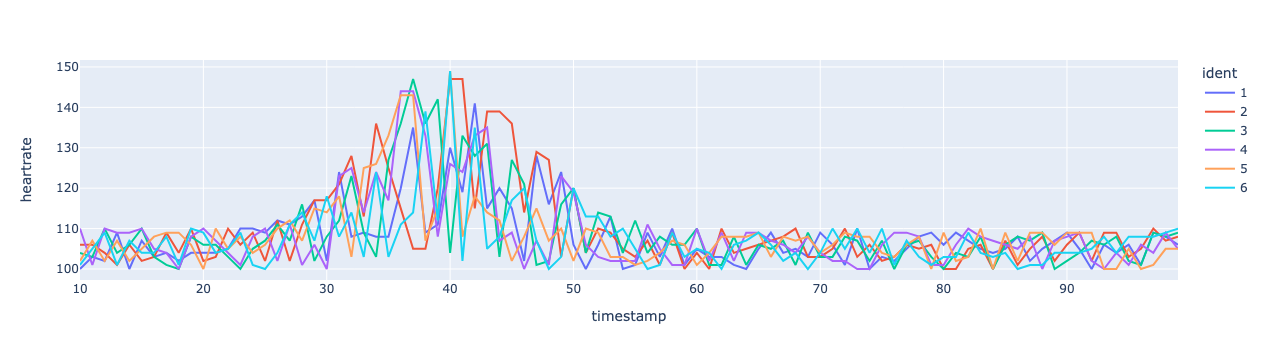

In [57]:
df = sample_subjects()
fig = px.line(df, color="ident", x="timestamp", y="heartrate")
fig.show()
df.to_csv("themoxalide.csv", index=False)